In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the dataset
df=pd.read_csv('loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
print("The dataset contains",df.shape[0],"rows and",df.shape[1],"columns.")

The dataset contains 614 rows and 13 columns.


There are certain columns which do not help much for the model prediction, lets drop them and continue further.

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
#Dropping unnecessary columns
df.drop(['Loan_ID','Gender','Education'],axis=1,inplace=True)
df.head()

,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,No,0,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Yes,1,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Yes,0,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Yes,0,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,No,0,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
#checking for null values
df.isnull().sum()

Married               3
Dependents           15
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

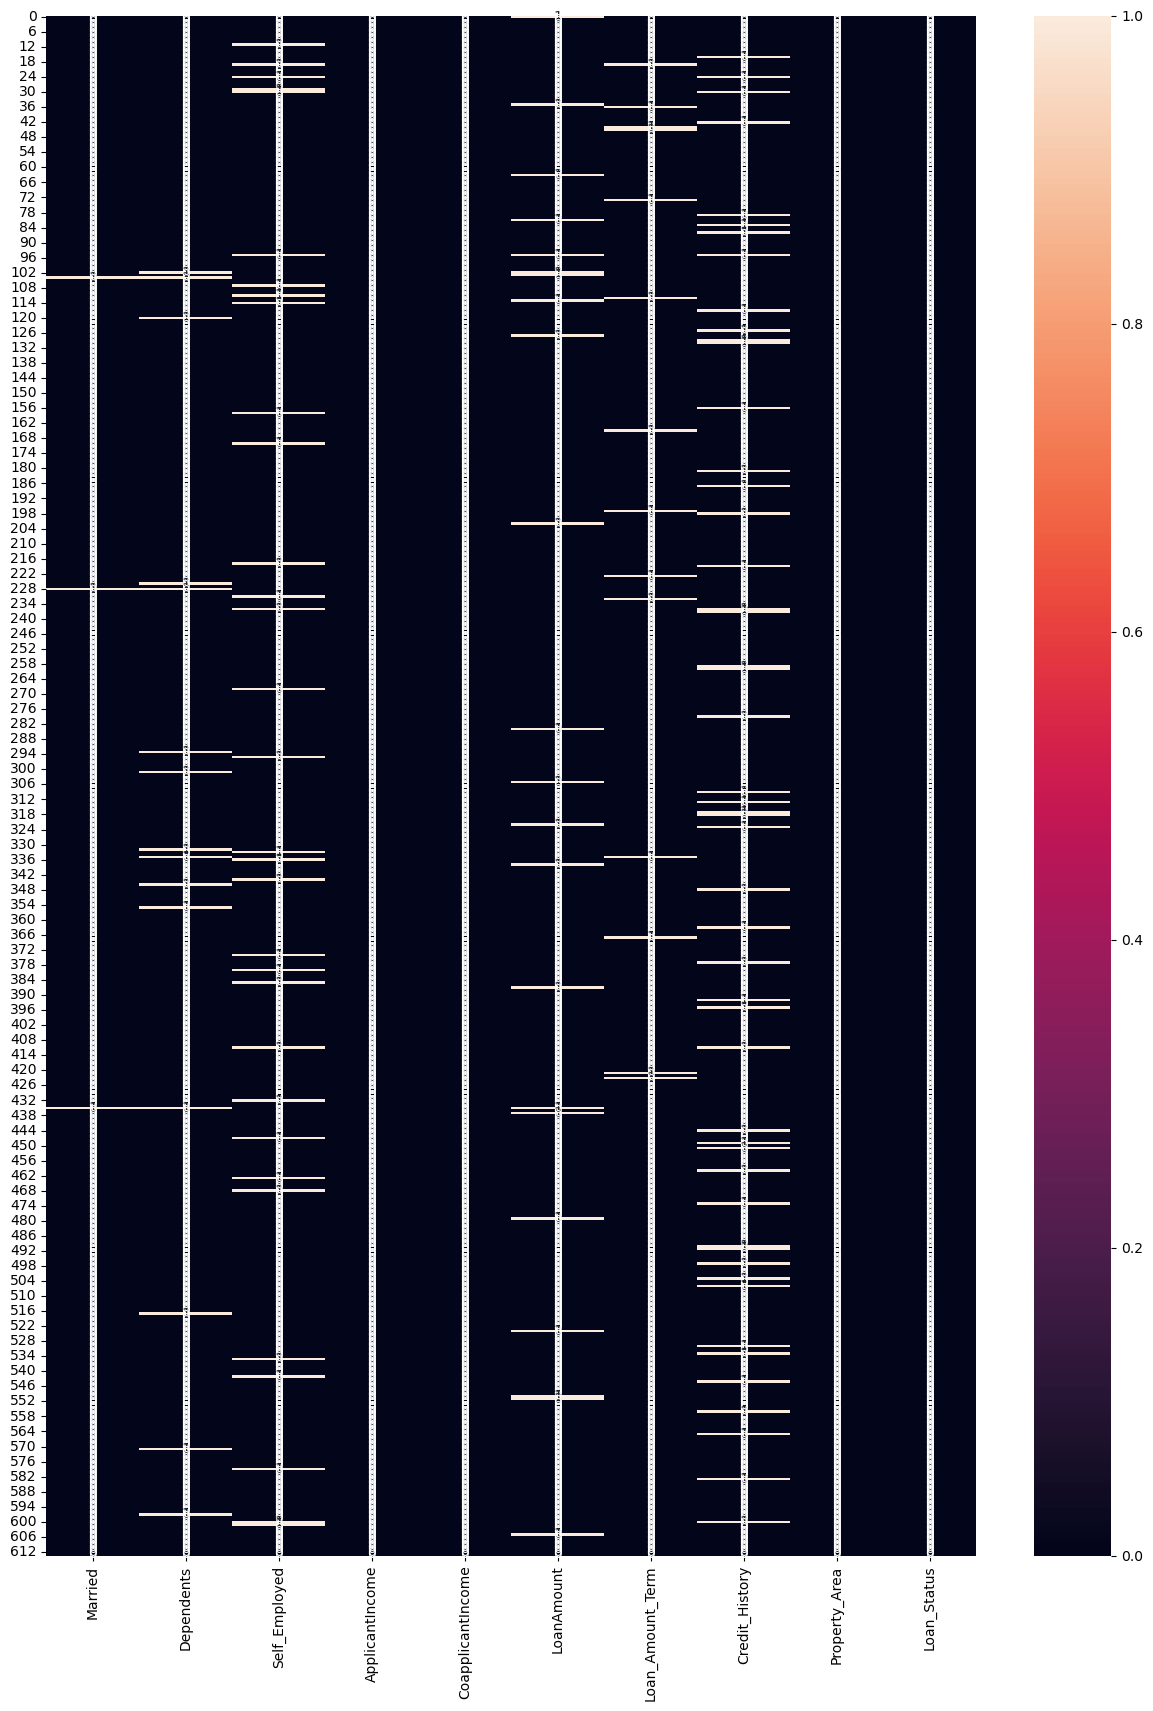

In [7]:
#Visulaizing null values
plt.figure(figsize=(15,20))
sns.heatmap(df.isnull(),annot=True)
plt.show()

We can see there are certain values present in the dataset, lets replace them with certain values. For categorical values we will fill it with 'mode' value and for continuous value we will impute the mean value.

In [8]:
df.isnull().sum()

Married               3
Dependents           15
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df['Married']=df['Married'].fillna(df['Married'].mode()[0])

In [10]:
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [11]:
#Checking null values after imputing values
df.isnull().sum()

Married              0
Dependents           0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Here we can see there are no null values present in the dataset

In [12]:
df.sample(10)

,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
555,Yes,1,No,5468,1032.0,26.0,360.0,1.0,Semiurban,Y
375,Yes,0,No,4817,923.0,120.0,180.0,1.0,Urban,Y
518,No,0,No,4683,1915.0,185.0,360.0,1.0,Semiurban,N
602,Yes,3+,No,5703,0.0,128.0,360.0,1.0,Urban,Y
171,Yes,3+,No,51763,0.0,700.0,300.0,1.0,Urban,Y
276,Yes,0,No,3993,3274.0,207.0,360.0,1.0,Semiurban,Y
558,Yes,0,No,3887,2669.0,162.0,360.0,1.0,Semiurban,Y
371,Yes,2,No,5185,0.0,155.0,360.0,1.0,Semiurban,Y
58,Yes,1,No,8080,2250.0,180.0,360.0,1.0,Urban,Y
445,Yes,1,Yes,3466,1210.0,130.0,360.0,1.0,Rural,Y


In [13]:
#Checking duplicate values
df.duplicated().sum()

1

As there is only one duplicate value, we can drop it and proceed further.

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
#Checking duplicates after removing
df.duplicated().sum()

0

Now there are no duplicate values.

In [16]:
#Checking unique values of each column
for i in df:
    print(df[i].value_counts())
    print("\n")

Yes    400
No     213
Name: Married, dtype: int64


0     359
1     102
2     101
3+     51
Name: Dependents, dtype: int64


No     531
Yes     82
Name: Self_Employed, dtype: int64


2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64


0.0       273
2500.0      5
2083.0      5
1666.0      5
2333.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64


146.412162    22
120.000000    20
110.000000    16
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: LoanAmount, Length: 204, dtype: int64


360.0    525
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


1.0    524
0.0     89
Name: Credit_History, dty

# Description

In [17]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,613.000000,613.000000,613.000000,613.000000,613.000000
mean,5405.205546,1619.892202,146.471562,342.381729,0.854812
std,6113.877312,2928.445733,84.093197,64.477319,0.352578
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2876.000000,0.000000,100.000000,360.000000,1.000000
50%,3812.000000,1167.000000,129.000000,360.000000,1.000000
75%,5800.000000,2283.000000,165.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


By seeing this chart we can say that there are outliers and skewness present in the dataset.
There are no null values in the dataset.

In [18]:
df.describe(include='O')

,Married,Dependents,Self_Employed,Property_Area,Loan_Status
count,613,613,613,613,613
unique,2,4,2,3,2
top,Yes,0,No,Semiurban,Y
freq,400,359,531,233,422


Here also we can see there are no null values in categorical columns.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 613 entries, 0 to 613
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Married            613 non-null    object 
 1   Dependents         613 non-null    object 
 2   Self_Employed      613 non-null    object 
 3   ApplicantIncome    613 non-null    int64  
 4   CoapplicantIncome  613 non-null    float64
 5   LoanAmount         613 non-null    float64
 6   Loan_Amount_Term   613 non-null    float64
 7   Credit_History     613 non-null    float64
 8   Property_Area      613 non-null    object 
 9   Loan_Status        613 non-null    object 
dtypes: float64(4), int64(1), object(5)
memory usage: 52.7+ KB


# Visualization

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

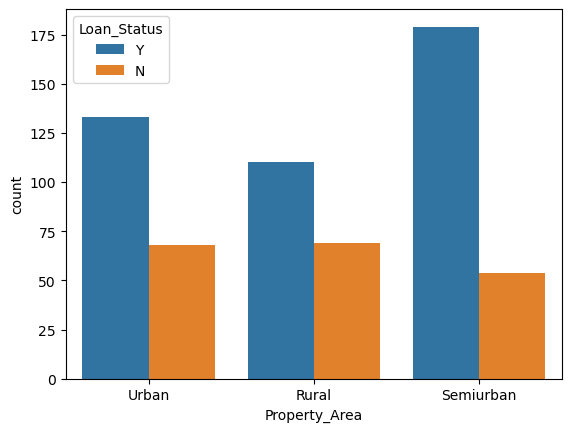

In [20]:
sns.countplot(hue=df.Loan_Status,x=df.Property_Area)

<AxesSubplot:xlabel='Married', ylabel='count'>

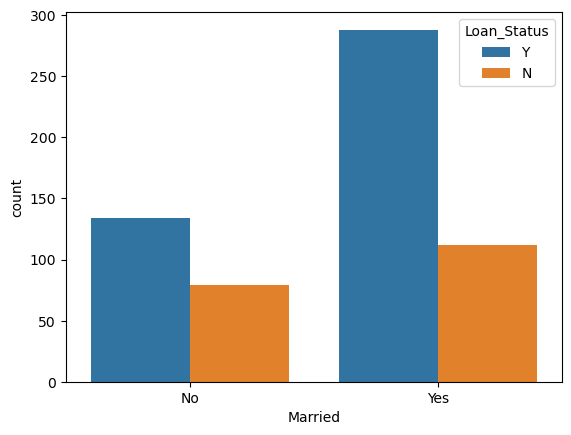

In [21]:
sns.countplot(hue=df.Loan_Status,x=df.Married,palette='tab10')

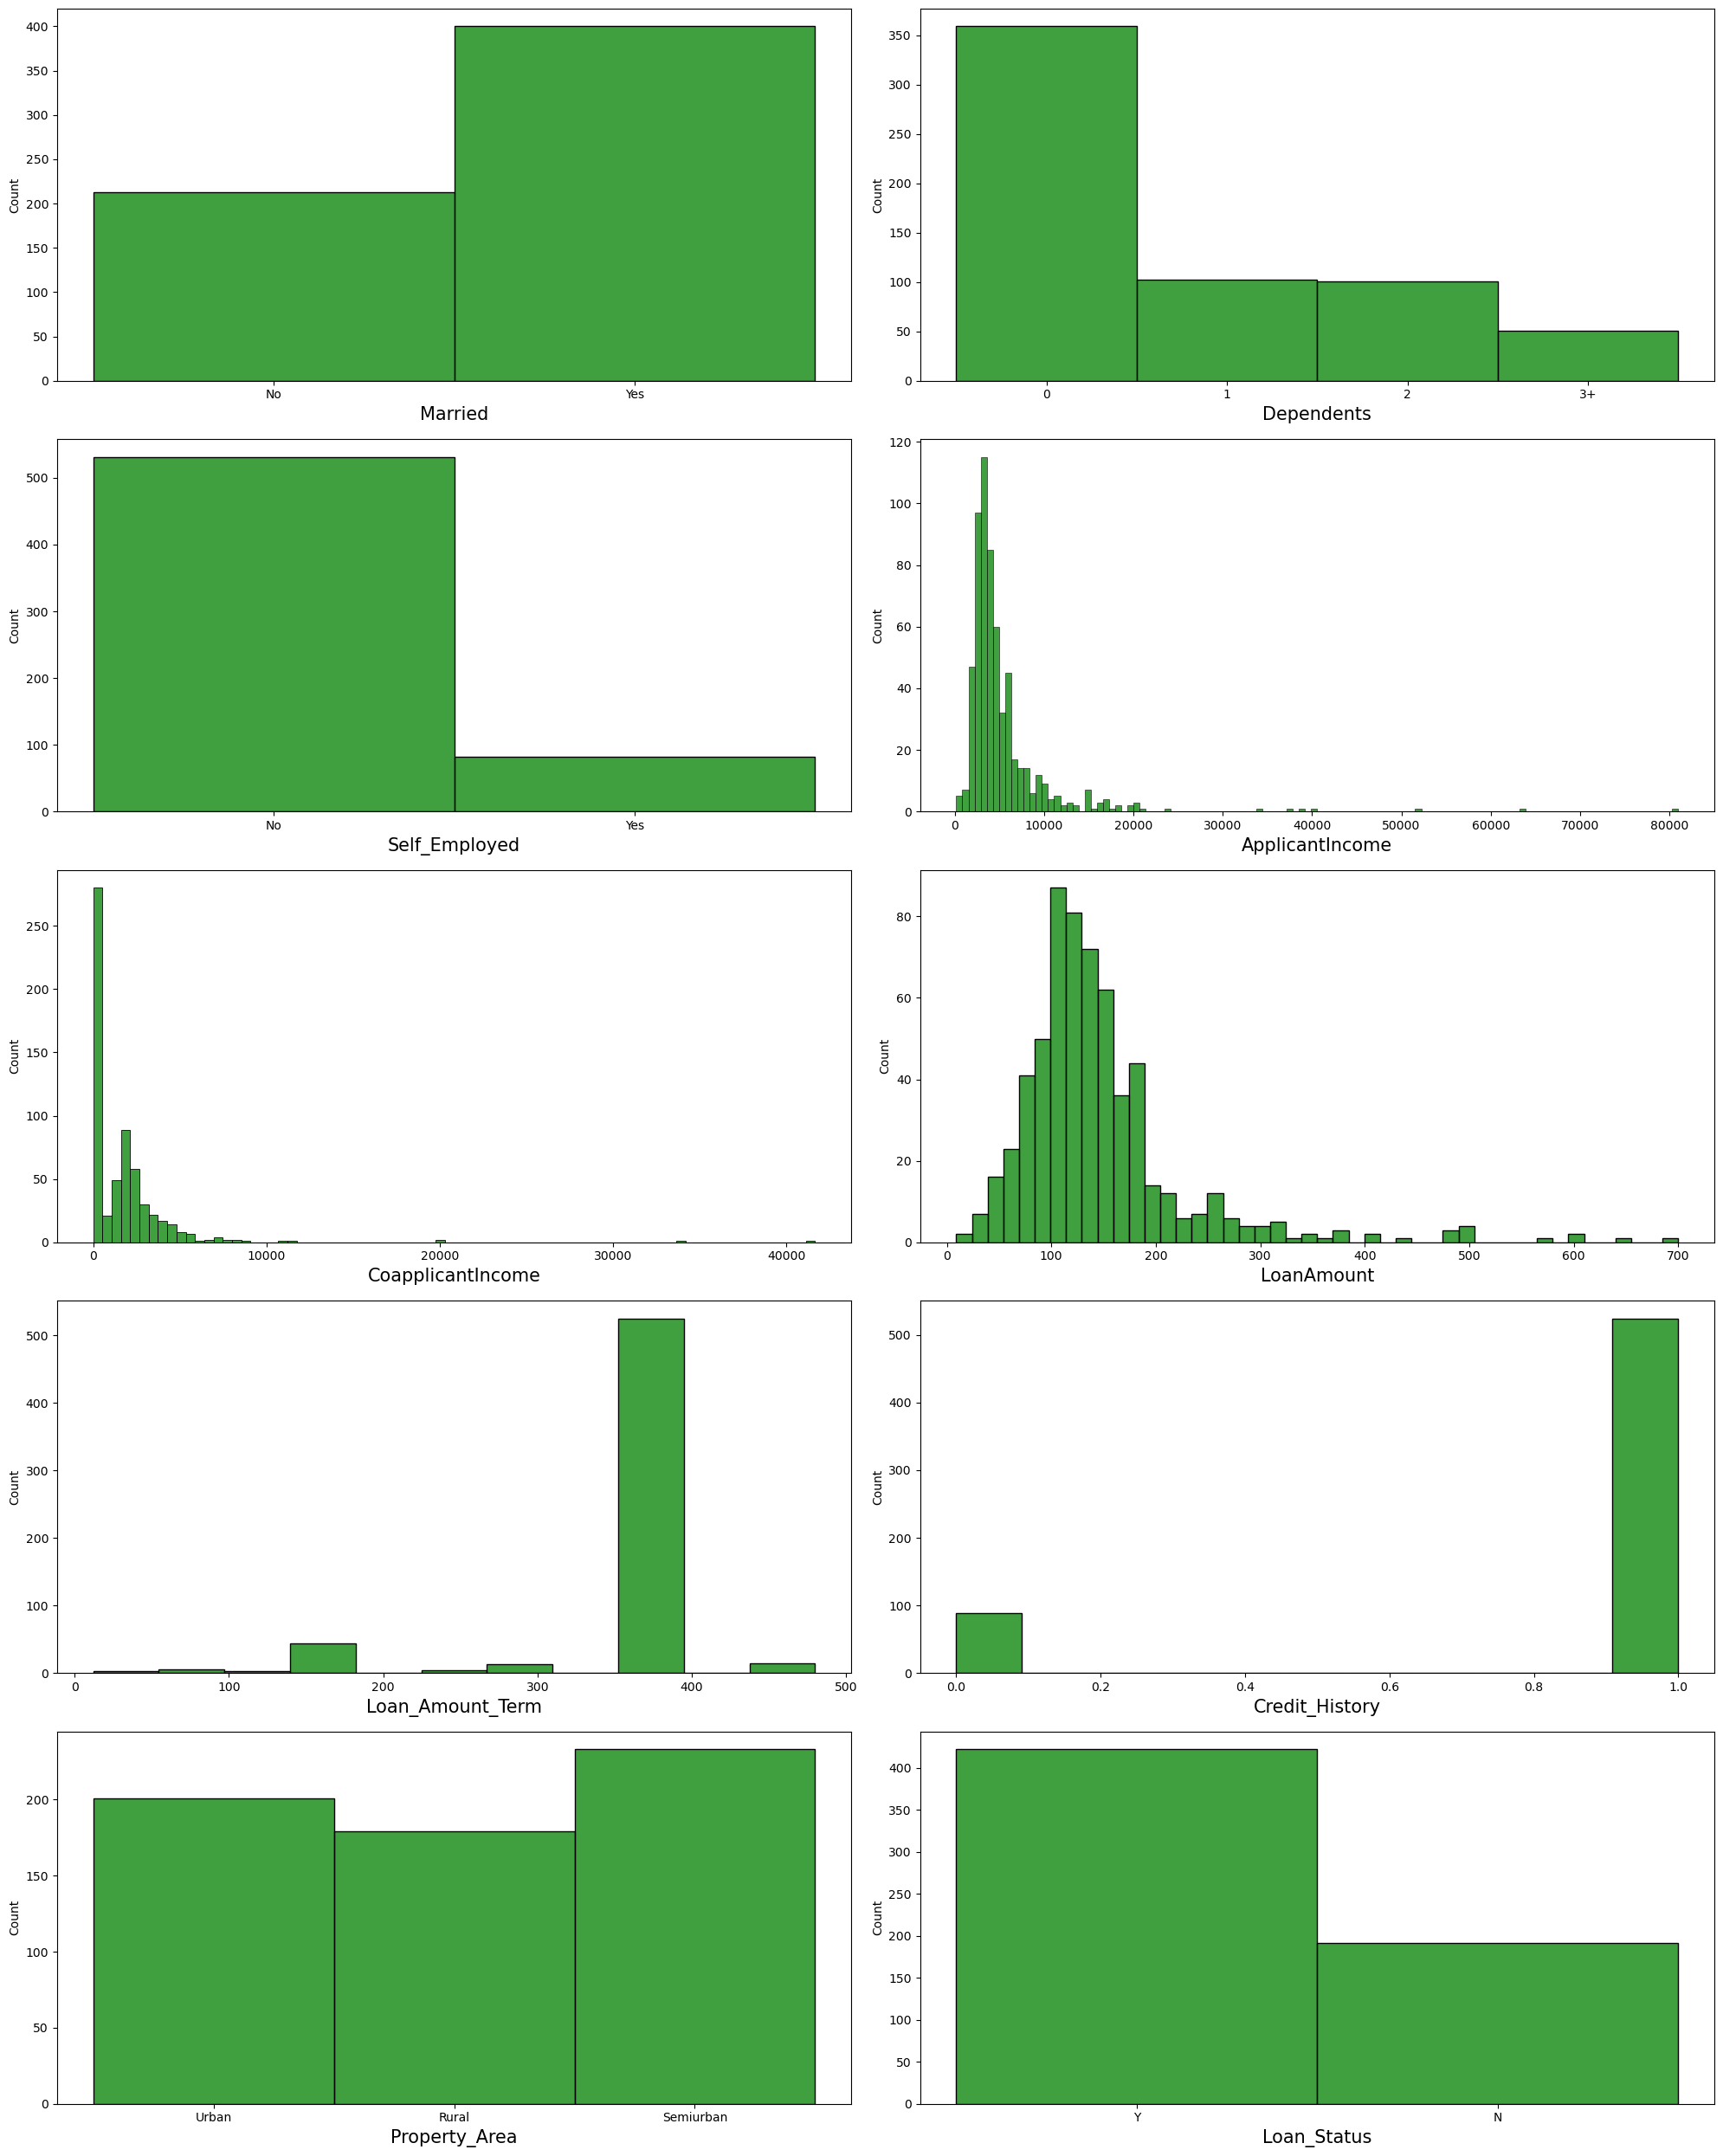

In [22]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=10:
        plt.subplot(5,2,p)
        sns.histplot(df[i],color='green')
        plt.xlabel(i,fontsize=15)
    p+=1
plt.tight_layout()

<AxesSubplot:xlabel='Married', ylabel='count'>

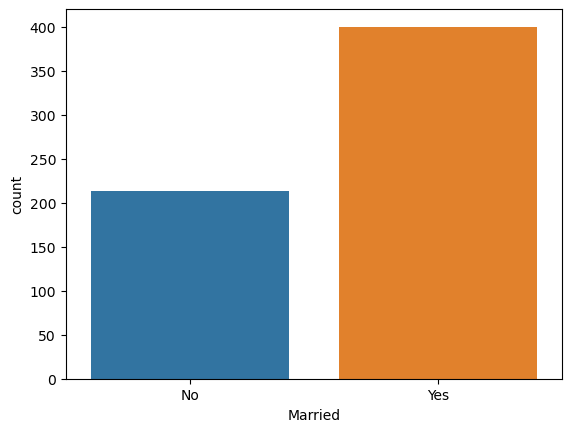

In [23]:
sns.countplot(x='Married',data=df)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

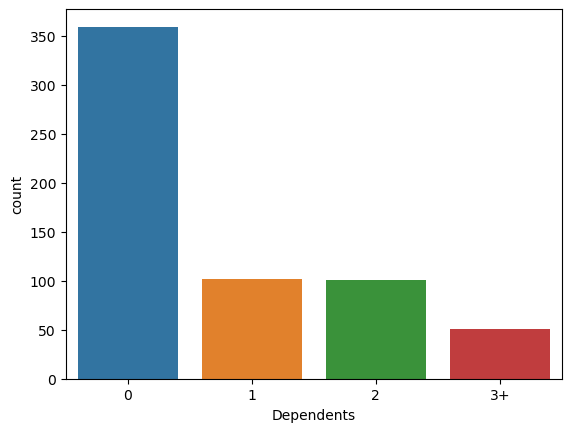

In [24]:
sns.countplot(df.Dependents)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

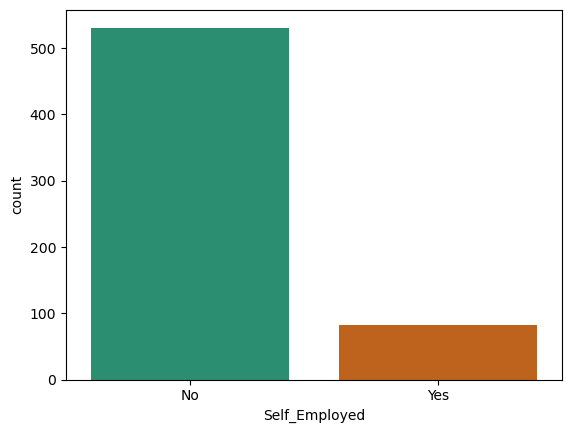

In [25]:
sns.countplot(x=df.Self_Employed,palette='Dark2')

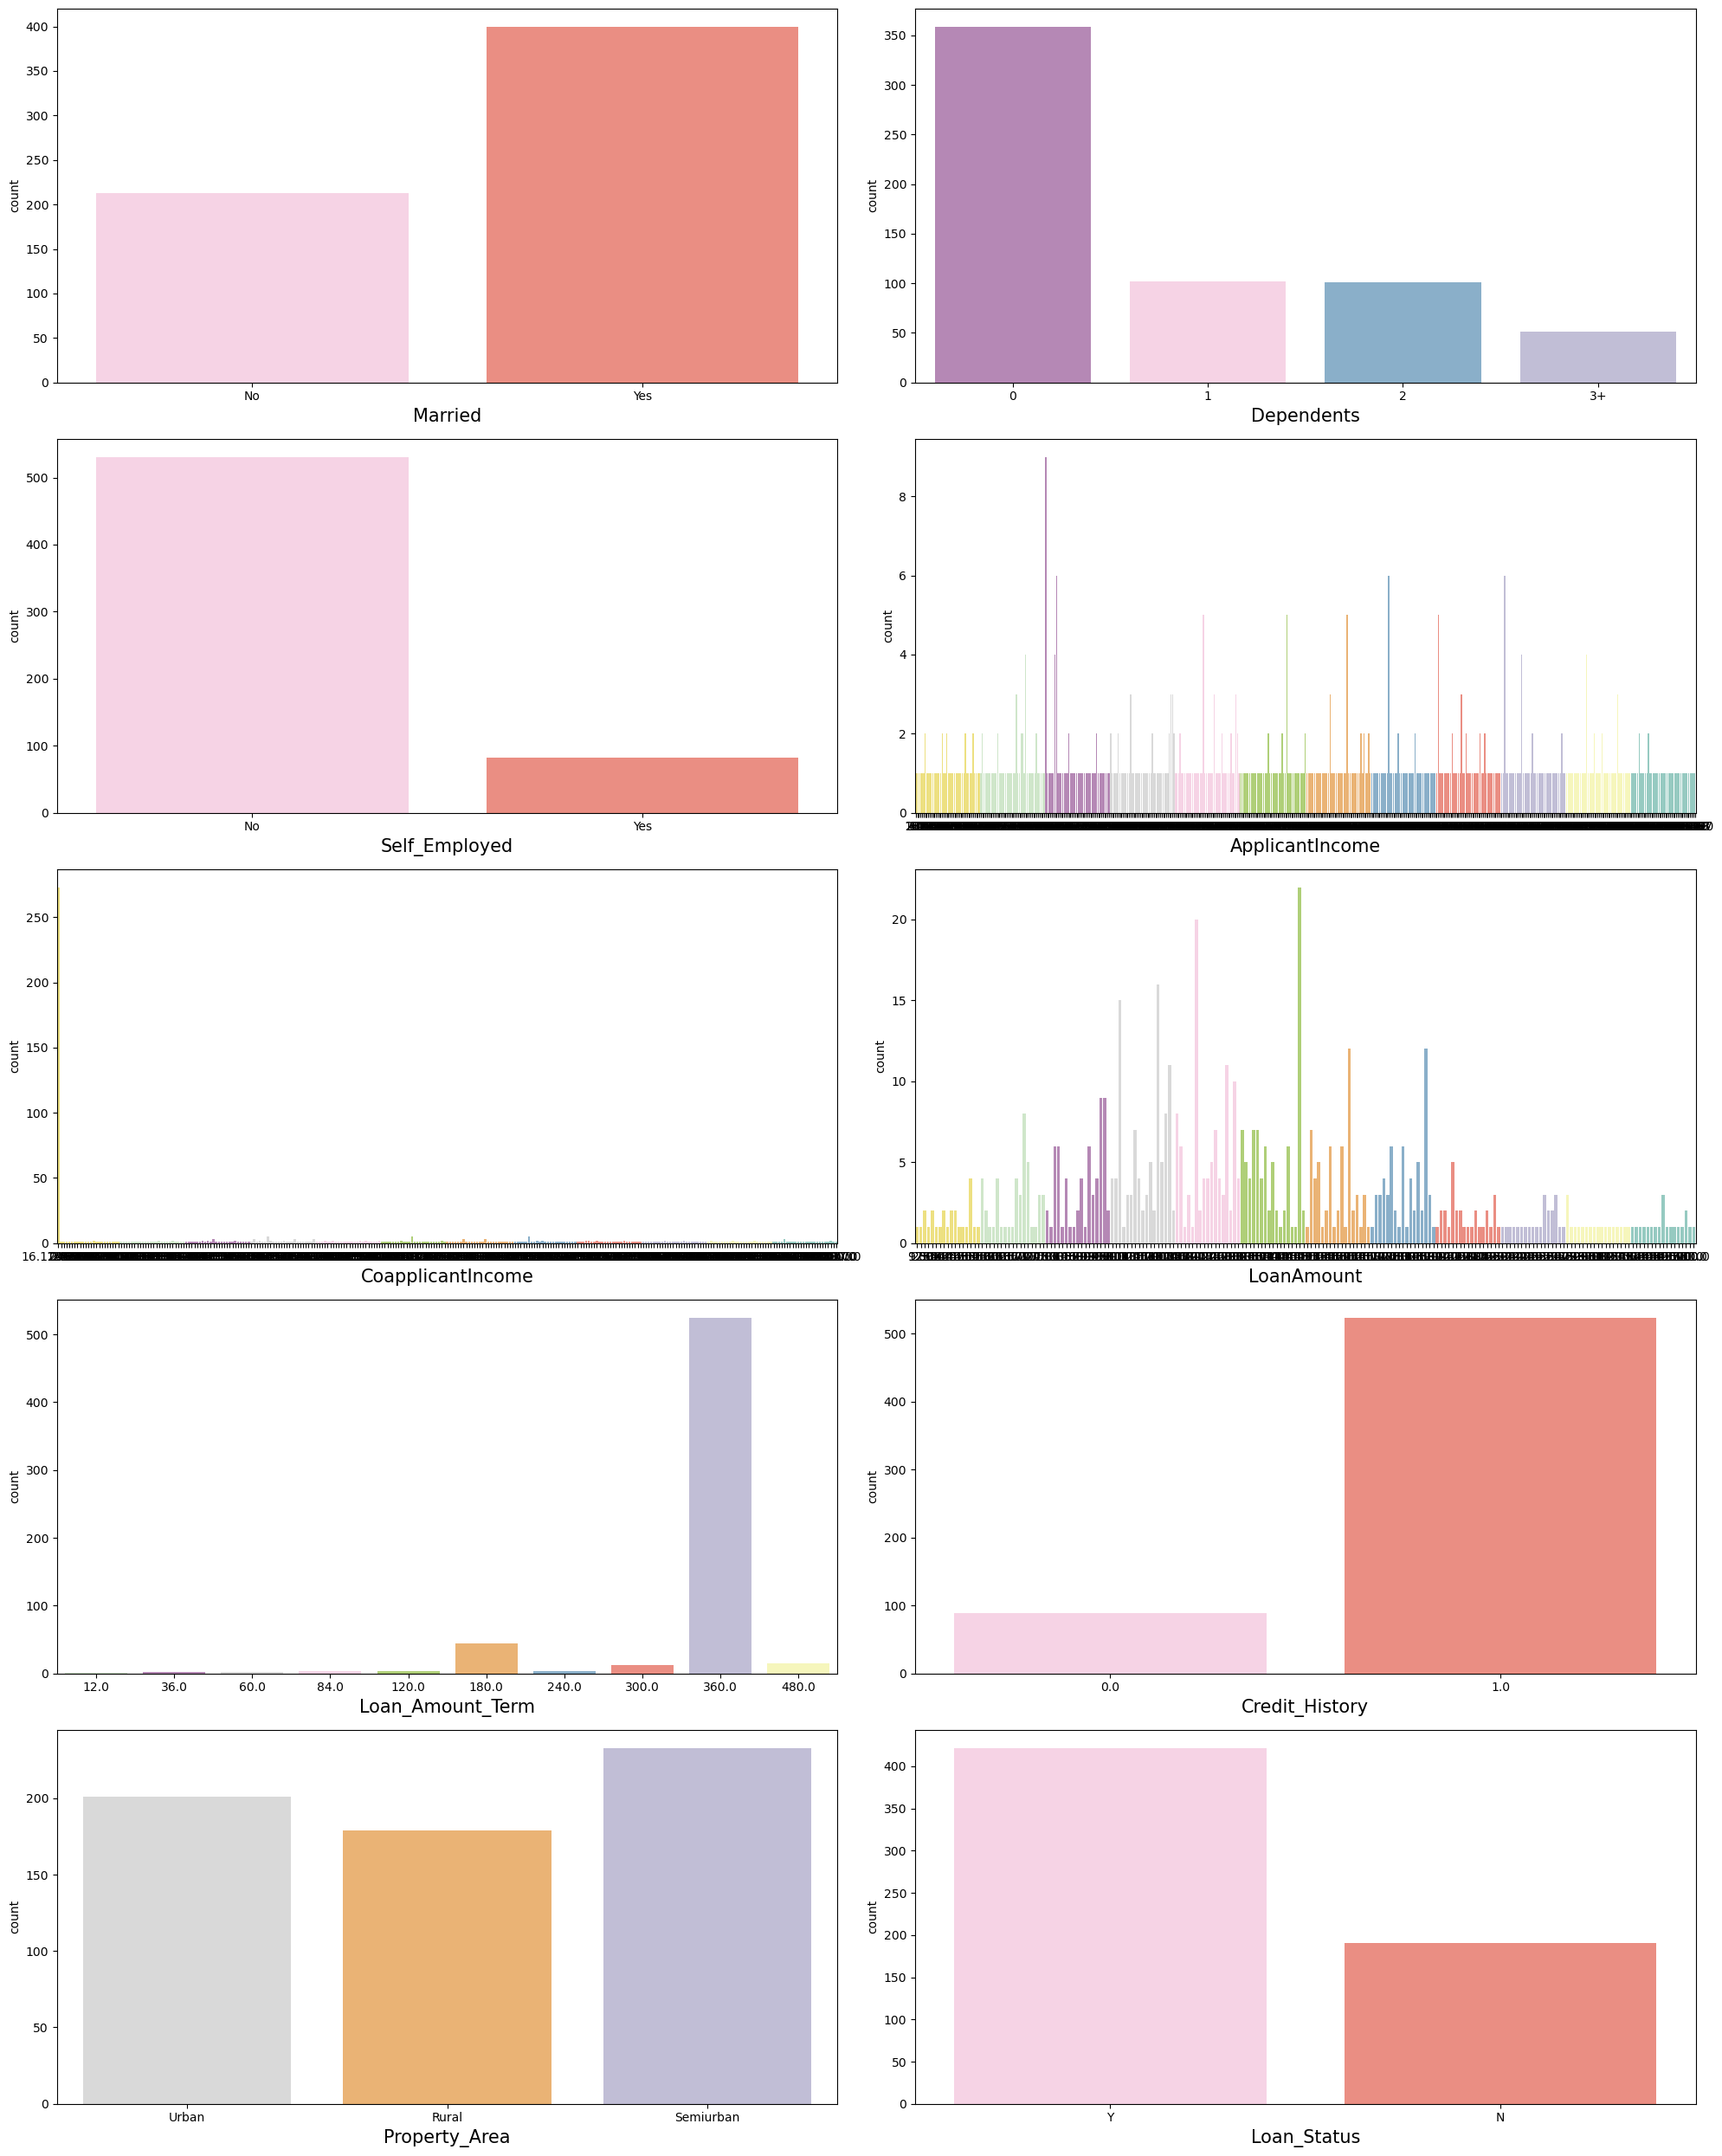

In [26]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=10:
        plt.subplot(5,2,p)
        sns.countplot(df[i],palette='Set3_r')
        plt.xlabel(i,fontsize=15)
    p+=1
plt.tight_layout()

([<matplotlib.patches.Wedge at 0x202ca3440d0>,
 [Text(-0.6137613405841104, 0.9128510375764471, 'Y'),
  Text(0.6137613405841101, -0.9128510375764471, 'N')])

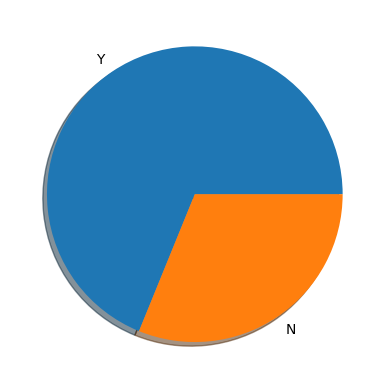

In [27]:
plt.pie(df['Loan_Status'].value_counts(),labels=['Y','N'],shadow=True)

<AxesSubplot:xlabel='Loan_Status', ylabel='Loan_Amount_Term'>

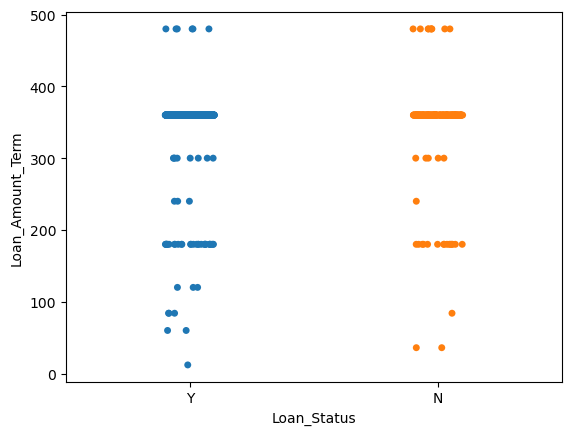

In [28]:
sns.stripplot(y=df['Loan_Amount_Term'],x=df.Loan_Status)

<AxesSubplot:ylabel='ApplicantIncome'>

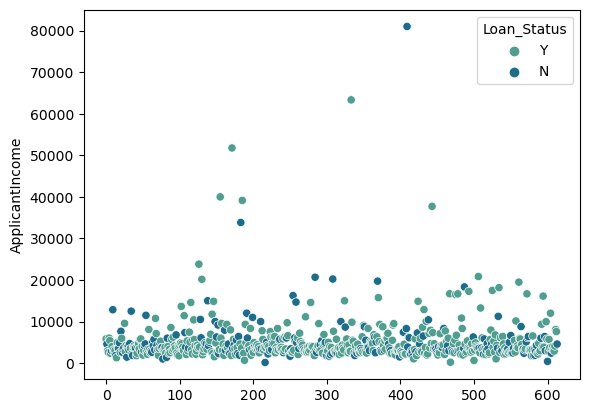

In [29]:
sns.scatterplot(x=df.index,y=df['ApplicantIncome'],hue=df['Loan_Status'],palette='crest')

<AxesSubplot:xlabel='Property_Area'>

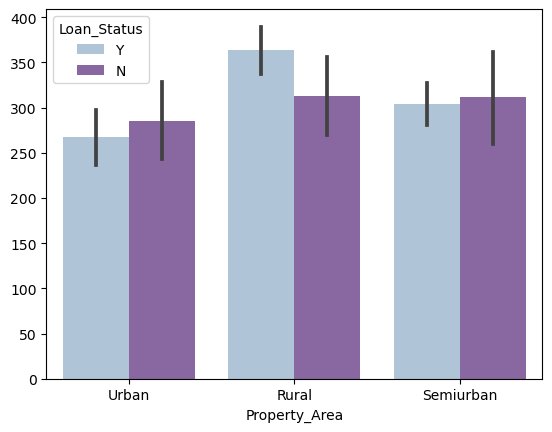

In [30]:
sns.barplot(y=df.index,x=df['Property_Area'],data=df,hue=df.Loan_Status,palette='BuPu')

([<matplotlib.patches.Wedge at 0x202ca5bea30>,
 [Text(-0.9875449247577294, 0.4845152439142145, '0.0'),
  Text(0.9875449020759327, -0.48451529014452843, '1.0')])

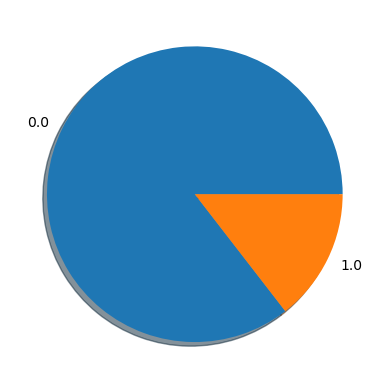

In [31]:
plt.pie(df['Credit_History'].value_counts(),labels=[0.0,1.0],shadow=True)

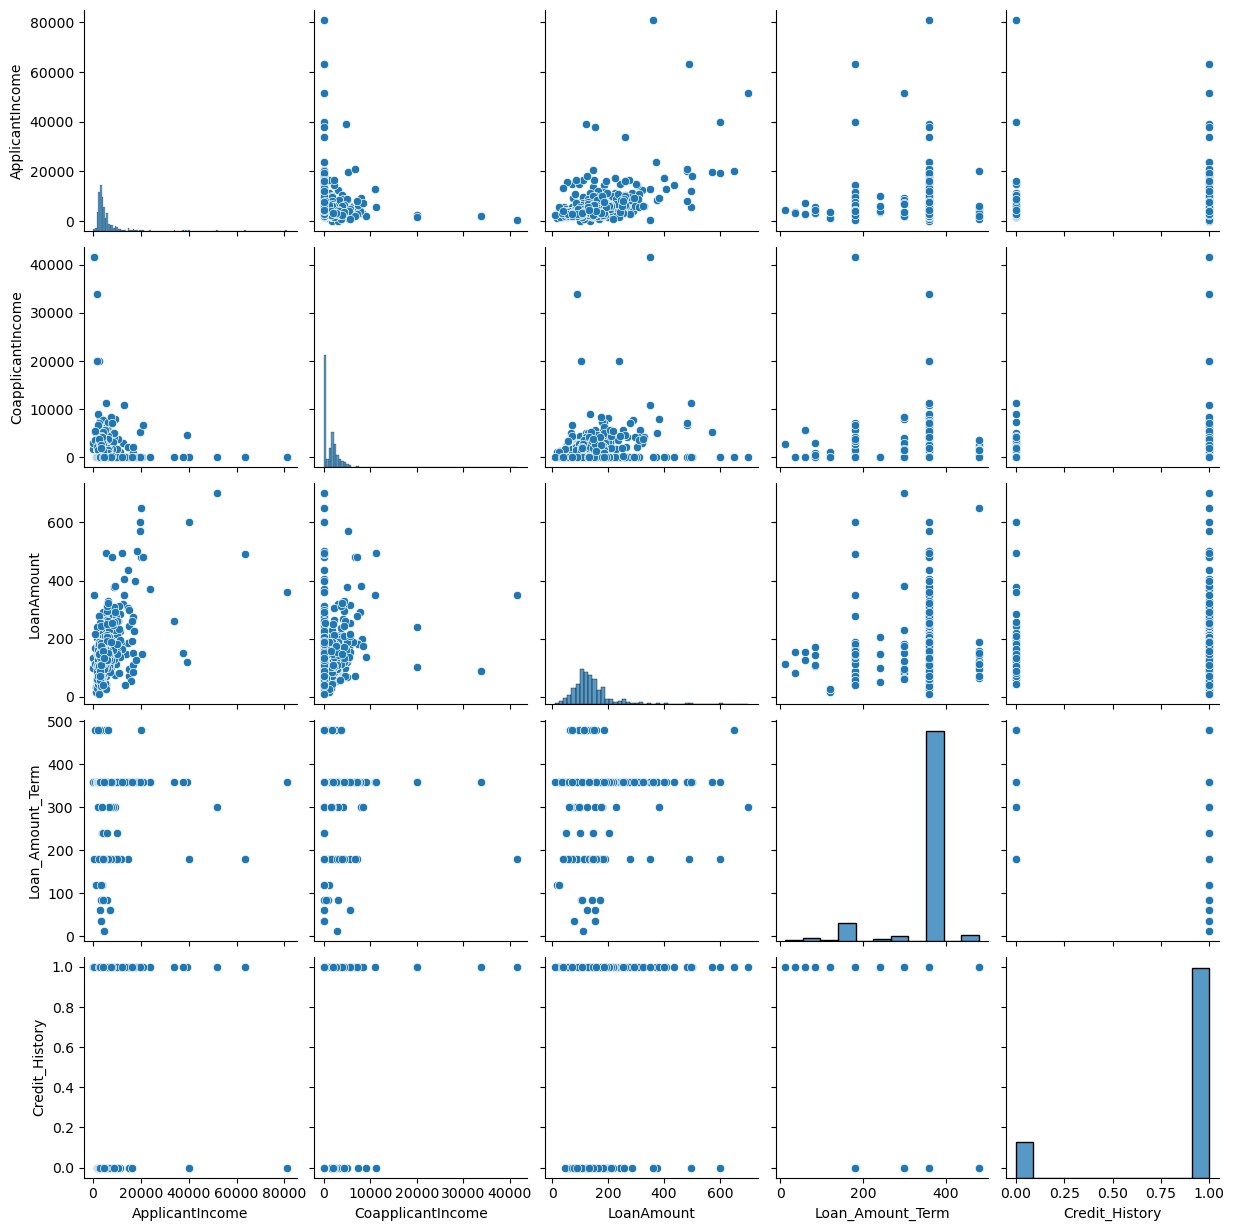

In [32]:
sns.pairplot(data=df)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

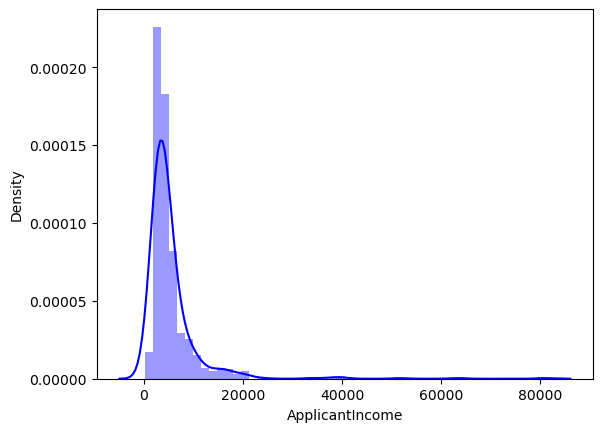

In [33]:
sns.distplot(df.ApplicantIncome,color='blue')

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

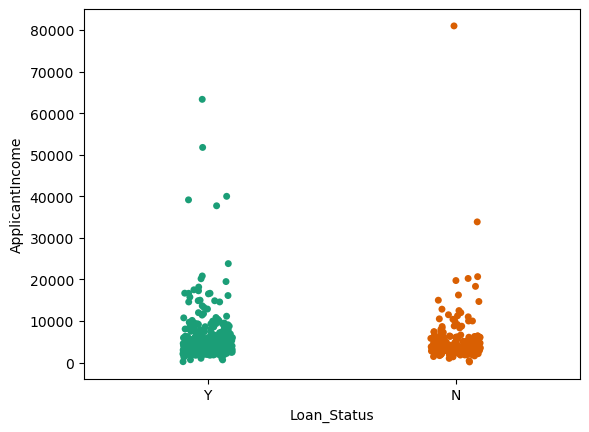

In [34]:
sns.stripplot(data=df,x='Loan_Status',y='ApplicantIncome',palette='Dark2')

# Outliers

Some column's data type is int because of numeric values present in them, but actually are categorical. So lets separate categorical and numerical column.

In [35]:
#Separating cat and num col
num_col=['ApplicantIncome','CoapplicantIncome','LoanAmount']
cat_col=['Married','Dependents','Self_Employed','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status']

In [36]:
num_col

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [37]:
cat_col

['Married',
 'Dependents',
 'Self_Employed',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

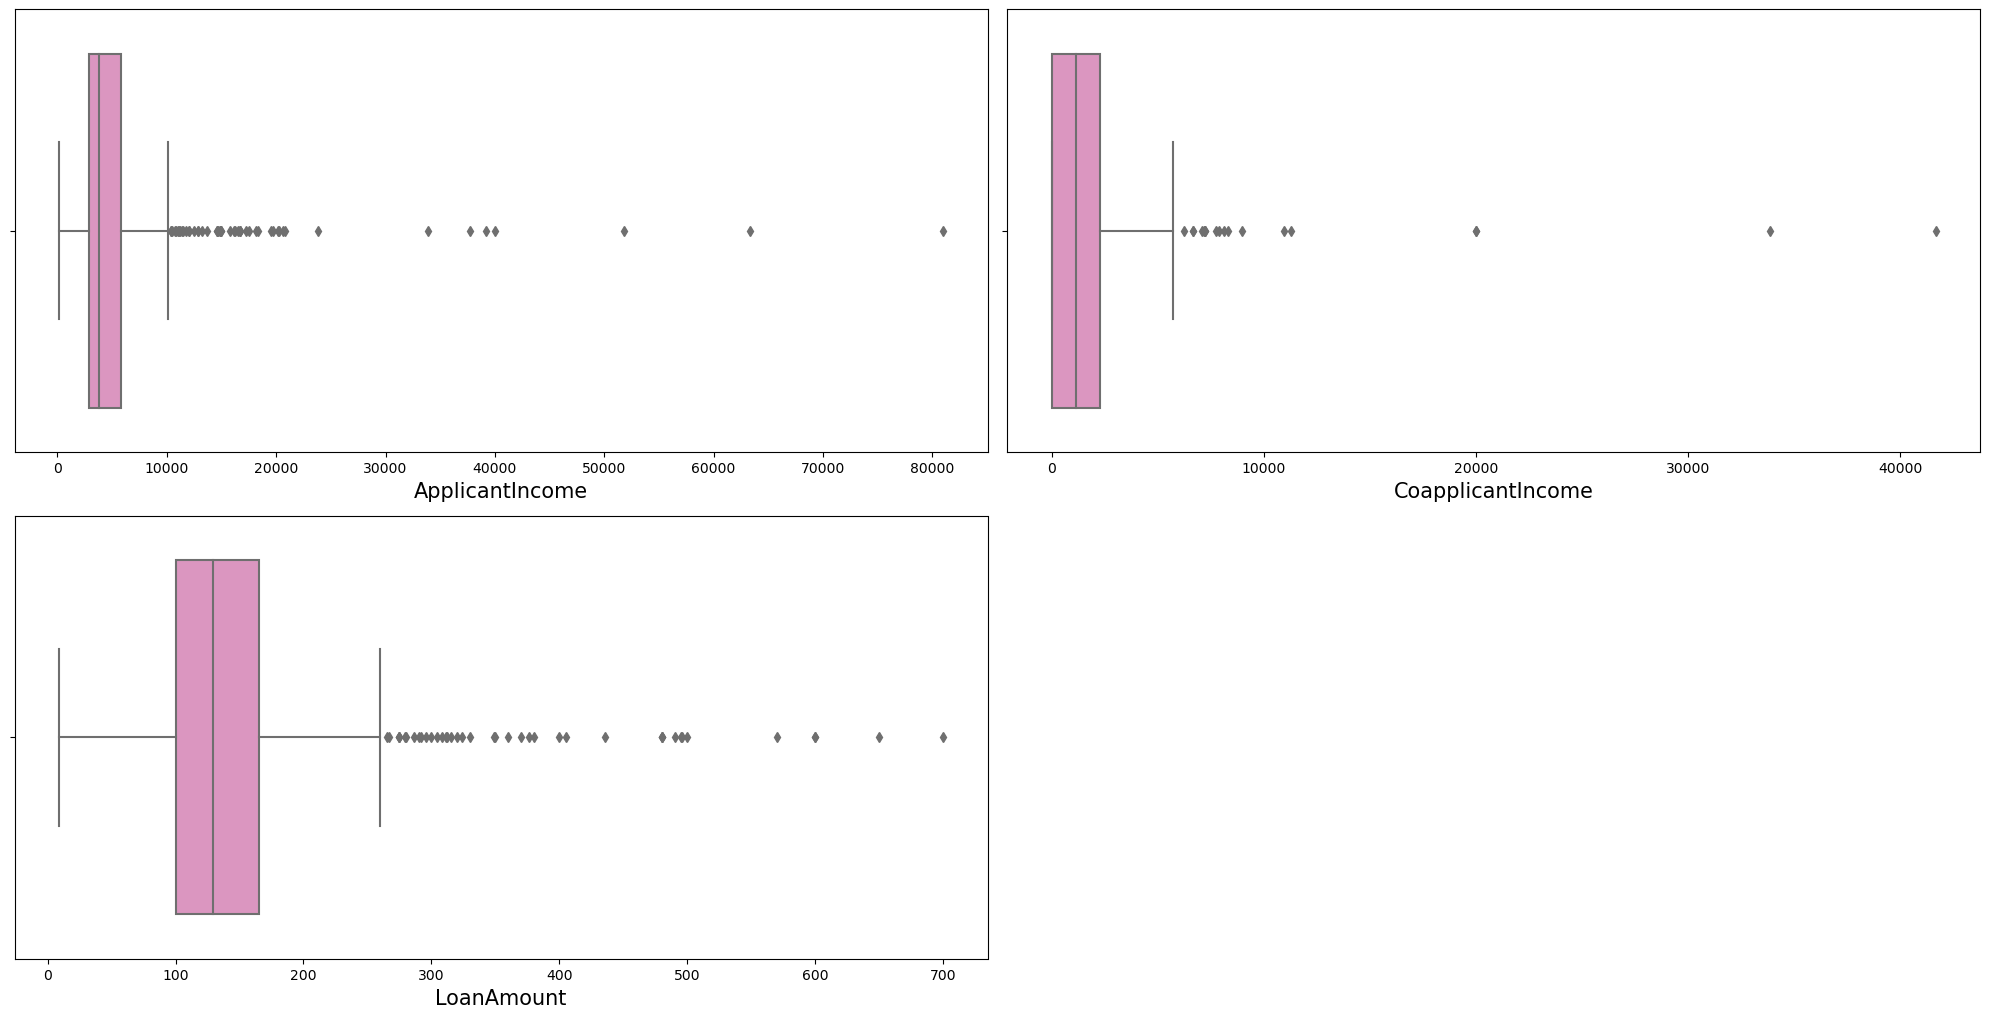

In [38]:
plt.figure(figsize=(20,25))
p=1
for i in num_col:
    if p<=10:
        plt.subplot(5,2,p)
        sns.boxplot(df[i],palette="Set2_r")
        plt.xlabel(i,fontsize=15)
    p+=1
plt.tight_layout()

Here we can see there are outliers in the dataset. 'LoanAmount' is our target variable so we will not remove outliers from this column. Lets proceed with removing outliers from other two columns.

In [39]:
#Removing Outliers
from scipy.stats import zscore
outliers=df[['ApplicantIncome','CoapplicantIncome']]
z=np.abs(zscore(outliers))
z

,ApplicantIncome,CoapplicantIncome
0,0.072647,0.553609
1,0.134592,0.038240
2,0.393722,0.553609
3,0.461983,0.252253
4,0.097365,0.553609
...,...,...
609,0.410092,0.553609
610,0.212675,0.553609
611,0.436543,0.471588
612,0.356496,0.553609


In [40]:
threshold=3
print(np.where(z>3))

(array([  9, 126, 155, 171, 177, 183, 185, 333, 402, 409, 417, 443, 580,
       599], dtype=int64), array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1], dtype=int64))


In [41]:
df_new=df[(z<3).all(axis=1)]
df_new

,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,No,0,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Yes,1,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Yes,0,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Yes,0,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,No,0,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...
609,No,0,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Yes,3+,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Yes,1,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Yes,2,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [42]:
print("Data loss percentage=",(df.shape[0]-df_new.shape[0])/df.shape[0]*100)

Data loss percentage= 2.2838499184339316


we can see the data loss is only 2%, so lets proceed with the new dataset.

In [43]:
df=df_new
df

,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,No,0,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Yes,1,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Yes,0,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Yes,0,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,No,0,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...
609,No,0,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Yes,3+,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Yes,1,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Yes,2,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


# Skewness

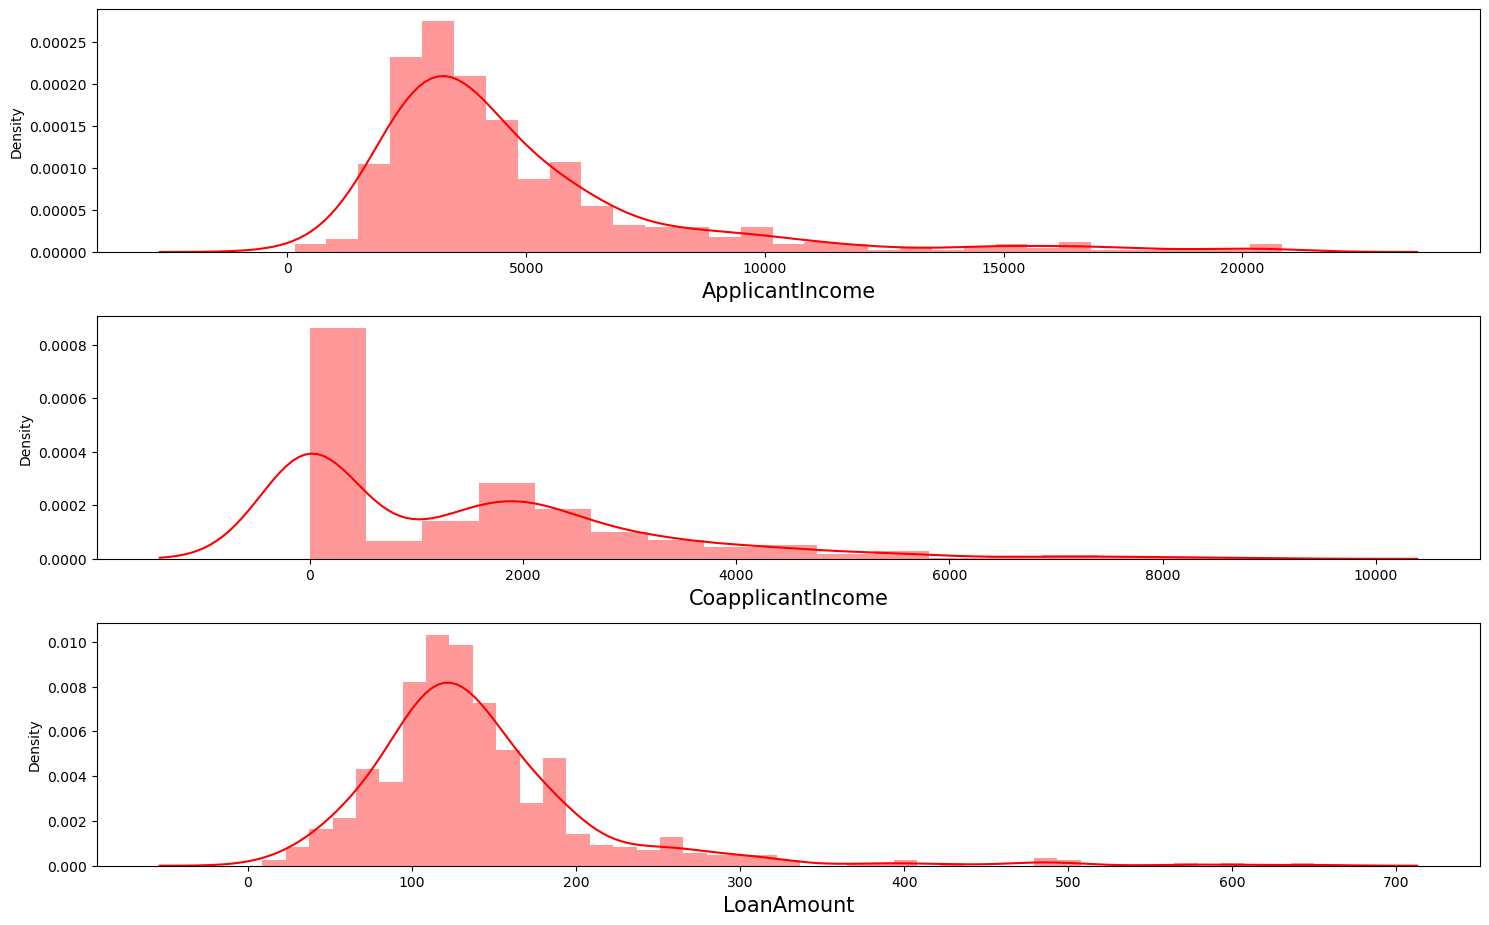

In [44]:
#Visualizing the skewness
plt.figure(figsize=(15,15))
p=1
for i in num_col:
    if p<=5:
        plt.subplot(5,1,p)
        sns.distplot(df[i],color='red')
        plt.xlabel(i,fontsize=15)
    p+=1
plt.tight_layout()

In [45]:
df.skew()

ApplicantIncome      2.293393
CoapplicantIncome    1.378748
LoanAmount           2.577676
Loan_Amount_Term    -2.440571
Credit_History      -2.038026
dtype: float64

In [46]:
#Checking skewness again
df.skew()

ApplicantIncome      2.293393
CoapplicantIncome    1.378748
LoanAmount           2.577676
Loan_Amount_Term    -2.440571
Credit_History      -2.038026
dtype: float64

After applying boxcox 'coapplicantIncome' results to NaN as most of its values are 0, so lets continue by dropping this column.

In [47]:
df.drop('CoapplicantIncome',axis=1,inplace=True)

In [48]:
df.head()

,Married,Dependents,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,No,0,No,5849,146.412162,360.0,1.0,Urban,Y
1,Yes,1,No,4583,128.000000,360.0,1.0,Rural,N
2,Yes,0,Yes,3000,66.000000,360.0,1.0,Urban,Y
3,Yes,0,No,2583,120.000000,360.0,1.0,Urban,Y
4,No,0,No,6000,141.000000,360.0,1.0,Urban,Y


In [49]:
df.skew()

ApplicantIncome     2.293393
LoanAmount          2.577676
Loan_Amount_Term   -2.440571
Credit_History     -2.038026
dtype: float64

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 599 entries, 0 to 613
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Married           599 non-null    object 
 1   Dependents        599 non-null    object 
 2   Self_Employed     599 non-null    object 
 3   ApplicantIncome   599 non-null    int64  
 4   LoanAmount        599 non-null    float64
 5   Loan_Amount_Term  599 non-null    float64
 6   Credit_History    599 non-null    float64
 7   Property_Area     599 non-null    object 
 8   Loan_Status       599 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 46.8+ KB


# Encoding

In [51]:
from sklearn.preprocessing import LabelEncoder
list=['Married','Dependents','Self_Employed','Property_Area','Loan_Status']
le=LabelEncoder()
for i in list:
    df[i]=le.fit_transform(df[i])
df.head()

,Married,Dependents,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,5849,146.412162,360.0,1.0,2,1
1,1,1,0,4583,128.000000,360.0,1.0,0,0
2,1,0,1,3000,66.000000,360.0,1.0,2,1
3,1,0,0,2583,120.000000,360.0,1.0,2,1
4,0,0,0,6000,141.000000,360.0,1.0,2,1


In [52]:
#separating target and feature column
x=df.iloc[:,0:-1]
x.head()

,Married,Dependents,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,0,0,5849,146.412162,360.0,1.0,2
1,1,1,0,4583,128.000000,360.0,1.0,0
2,1,0,1,3000,66.000000,360.0,1.0,2
3,1,0,0,2583,120.000000,360.0,1.0,2
4,0,0,0,6000,141.000000,360.0,1.0,2


In [53]:
y=df.iloc[:,-1]
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

In [54]:
#Checking if the data is balanced or inbalanced
y.value_counts()

1    415
0    184
Name: Loan_Status, dtype: int64

The dataset is imbalanced. Lets balance it so to proceed further.

In [55]:
from imblearn.over_sampling import SMOTE

In [56]:
smt=SMOTE()
x,y=smt.fit_resample(x,y)
y.value_counts()

1    415
0    415
Name: Loan_Status, dtype: int64

Now the dataset is balanced.

# Multi_Collinearity

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [58]:
vif=pd.DataFrame()
vif['VIF_Values']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,VIF_Values,Features
0,2.610072,Married
1,1.645128,Dependents
2,1.196508,Self_Employed
3,5.489582,ApplicantIncome
4,8.568455,LoanAmount
5,8.083525,Loan_Amount_Term
6,4.358586,Credit_History
7,2.336082,Property_Area


# Modelling

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [60]:
#finding ideal random_state
acc=0
rs=0
for i in range(0,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    rfc=RandomForestClassifier()
    rfc.fit(x_train,y_train)
    pred=rfc.predict(x_test)
    score=accuracy_score(y_test,pred)
    if score>acc:
        acc=score
        rs=i
print("Accuracy score at random state",i,"is",acc,".")

Accuracy score at random state 499 is 0.8722627737226277 .


In [61]:
#creating train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)

In [62]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)
print("Accuracy Score =",accuracy_score(y_test,lr_pred),"\n")
print("Confusion Matrix=",confusion_matrix(y_test,lr_pred))
print("Classification Report =",classification_report(y_test,lr_pred))

Accuracy Score = 0.7591240875912408 

Confusion Matrix= [[ 89  47]
 [ 19 119]]
Classification Report =               precision    recall  f1-score   support

           0       0.82      0.65      0.73       136
           1       0.72      0.86      0.78       138

    accuracy                           0.76       274
   macro avg       0.77      0.76      0.76       274
weighted avg       0.77      0.76      0.76       274



In [63]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc_pred=dtc.predict(x_test)
print("Accuracy Score =",accuracy_score(y_test,dtc_pred),"\n")
print("Confusion Matrix=",confusion_matrix(y_test,dtc_pred))
print("Classification Report =",classification_report(y_test,dtc_pred))

Accuracy Score = 0.7700729927007299 

Confusion Matrix= [[ 99  37]
 [ 26 112]]
Classification Report =               precision    recall  f1-score   support

           0       0.79      0.73      0.76       136
           1       0.75      0.81      0.78       138

    accuracy                           0.77       274
   macro avg       0.77      0.77      0.77       274
weighted avg       0.77      0.77      0.77       274



In [64]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc_pred=rfc.predict(x_test)
print("Accuracy Score =",accuracy_score(y_test,rfc_pred),"\n")
print("Confusion Matrix=",confusion_matrix(y_test,rfc_pred))
print("Classification Report =",classification_report(y_test,rfc_pred))

Accuracy Score = 0.8321167883211679 

Confusion Matrix= [[ 98  38]
 [  8 130]]
Classification Report =               precision    recall  f1-score   support

           0       0.92      0.72      0.81       136
           1       0.77      0.94      0.85       138

    accuracy                           0.83       274
   macro avg       0.85      0.83      0.83       274
weighted avg       0.85      0.83      0.83       274



In [65]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb_pred=gnb.predict(x_test)
print("Accuracy Score =",accuracy_score(y_test,gnb_pred),"\n")
print("Confusion Matrix=",confusion_matrix(y_test,gnb_pred))
print("Classification Report =",classification_report(y_test,gnb_pred))

Accuracy Score = 0.7737226277372263 

Confusion Matrix= [[ 77  59]
 [  3 135]]
Classification Report =               precision    recall  f1-score   support

           0       0.96      0.57      0.71       136
           1       0.70      0.98      0.81       138

    accuracy                           0.77       274
   macro avg       0.83      0.77      0.76       274
weighted avg       0.83      0.77      0.76       274



# Cross_Validation

In [66]:
from sklearn.model_selection import cross_val_score

In [67]:
#finding best k-fold
for i in range(2,20):
    score=cross_val_score(rfc,x,y,cv=i)
    print("At K-fold",i,"the CV score is",score.mean())

At K-fold 2 the CV score is 0.7951807228915663
At K-fold 3 the CV score is 0.8097106681316381
At K-fold 4 the CV score is 0.8194154124860646
At K-fold 5 the CV score is 0.8265060240963857
At K-fold 6 the CV score is 0.8231414868105515
At K-fold 7 the CV score is 0.8255336032718172
At K-fold 8 the CV score is 0.8315323935772965
At K-fold 9 the CV score is 0.8267752324554568
At K-fold 10 the CV score is 0.8265060240963855
At K-fold 11 the CV score is 0.8197926634768739
At K-fold 12 the CV score is 0.8207039337474121
At K-fold 13 the CV score is 0.8218482905982907
At K-fold 14 the CV score is 0.8161420500403551
At K-fold 15 the CV score is 0.8246753246753247
At K-fold 16 the CV score is 0.8267109728506787
At K-fold 17 the CV score is 0.827906162464986
At K-fold 18 the CV score is 0.8170675300647549
At K-fold 19 the CV score is 0.8220206965617003


Best score is at k-fold value 8, lets proceed with it.

In [68]:
rfc_score=cross_val_score(rfc,x,y,cv=8)
print(rfc_score)
print(rfc_score.mean())
print("The difference between accuracy and CV score =",(accuracy_score(y_test,rfc_pred))-(rfc_score.mean()))

[0.72115385 0.67307692 0.78846154 0.81730769 0.93269231 0.84615385
 0.87378641 0.89320388]
0.8182295556385362
The difference between accuracy and CV score = 0.0138872326826317


In [70]:
dtc_score=cross_val_score(dtc,x,y,cv=8)
print(dtc_score)
print(dtc_score.mean())
print("The difference between accuracy and CV score =",(accuracy_score(y_test,dtc_pred))-(dtc_score.mean()))

[0.65384615 0.64423077 0.69230769 0.78846154 0.84615385 0.84615385
 0.81553398 0.87378641]
0.7700592793129202
The difference between accuracy and CV score = 1.3713387809755062e-05


In [71]:
gnb_score=cross_val_score(gnb,x,y,cv=8)
print(gnb_score)
print(gnb_score.mean())
print("The difference between accuracy and CV score =",(accuracy_score(y_test,gnb_pred))-(gnb_score.mean()))

[0.70192308 0.66346154 0.72115385 0.73076923 0.82692308 0.84615385
 0.81553398 0.78640777]
0.7615407953696789
The difference between accuracy and CV score = 0.01218183236754744


In [72]:
lr_score=cross_val_score(lr,x,y,cv=8)
print(lr_score)
print(lr_score.mean())
print("The difference between accuracy and CV score =",(accuracy_score(y_test,lr_pred))-(lr_score.mean()))

[0.74038462 0.65384615 0.73076923 0.73076923 0.86538462 0.83653846
 0.81553398 0.73786408]
0.7638862957430919
The difference between accuracy and CV score = -0.004762208151851022


# Hyper_Parameter Tuning

In [73]:
from sklearn.model_selection import GridSearchCV

In [125]:
model=RandomForestClassifier()
parameters={'n_estimators':[125,200,126,789,199,499],'criterion':['gini','entropy','log_loss']}
grid=GridSearchCV(estimator=model,param_grid=parameters)
grid.fit(x,y)
print("GRID :",grid)
print("SCORE =",grid.best_score_)
print("PARAMS =",grid.best_params_)

GRID : GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': [125, 200, 126, 789, 199, 499]})
SCORE = 0.8349397590361445
PARAMS = {'criterion': 'gini', 'n_estimators': 199}


In [131]:
#Applying the parameters
rfc=RandomForestClassifier(criterion='gini',n_estimators=199)
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
print("Accuracy Score =",accuracy_score(y_test,pred))

Accuracy Score = 0.8284671532846716


In [114]:
model=DecisionTreeClassifier()
parameters={'criterion':['gini','entropy','log_loss'],'splitter':['best','random'],'max_depth':[0,2,5,1,3]}
grid=GridSearchCV(estimator=model,param_grid=parameters)
grid.fit(x,y)
print("GRID :",grid)
print("SCORE =",grid.best_score_)
print("PARAMS =",grid.best_params_)

GRID : GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [0, 2, 5, 1, 3],
                         'splitter': ['best', 'random']})
SCORE = 0.7987951807228916
PARAMS = {'criterion': 'gini', 'max_depth': 2, 'splitter': 'best'}


In [96]:
#Applying the parameters
dtc=DecisionTreeClassifier(criterion='gini',max_depth=2,splitter='best')
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
print("Accuracy =",accuracy_score(y_test,pred))

Accuracy = 0.7992700729927007


Model RandomForestClassifier is better than other models.

In [132]:
final_model=rfc
final_model

RandomForestClassifier(n_estimators=199)

# Saving and predicting the final model

In [133]:
import joblib
joblib.dump(final_model,"Loan_Status.pkl")

['Loan_Status.pkl']

In [134]:
model=joblib.load("Loan_Status.pkl")
prediction=model.predict(x_test)
prediction

array([1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1])

In [135]:
actual=np.array(y_test)
actual

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1])

In [137]:
ds=pd.DataFrame({'Actual_Value':actual,'Predicted_Value':prediction})
ds.sample(10)

,Actual_Value,Predicted_Value
218,0,0
120,0,1
128,1,1
0,1,1
198,1,1
122,1,1
204,0,0
42,0,0
51,1,1
273,1,1


We can see our model is performing well.